## 3. Data Preparation

### Importing Libraries

In [1]:
# Suppress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw_data.csv')

### Check first 5 values

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Check last 5 values

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### View dimensions of the dataset

In [5]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 614 rows and 13 columns


### Summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Find null values in the dataset

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum()*100 / len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Managing null values that were found in the above section

In [9]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
nullCols = ['Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']
df = df.dropna(subset=nullCols)

In [11]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    object 
 4   Self_Employed      523 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     505 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.2+ KB


In [13]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
# df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [15]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    object 
 4   Self_Employed      553 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.2+ KB


### Handling categorical columns

In [17]:
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value='4')

In [18]:
#Map gender
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0}).astype('int')

#
df['Married'] = df['Married'].map({'Yes' : 1, 'No' : 0}).astype('int')

#
df['Education'] = df['Education'].map({'Graduate' : 1, 'Not Graduate' : 0}).astype('int')

#
df['Self_Employed'] = df['Self_Employed'].map({'Yes' : 1, 'No' : 0}).astype('int')

#
df['Property_Area'] = df['Property_Area'].map({'Rural' : 0, 'Urban' : 1, 'Semiurban': 2}).astype('int')

#
df['Loan_Status'] = df['Loan_Status'].map({'Y' : 1, 'N' : 0}).astype('int')

In [19]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### Feature Matrix X and Response Y 

In [20]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

### Feature Scaling

In [21]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X[cols] = ss.fit_transform(X[cols])

In [39]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1


### Split Dataset into Train and Test

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [23]:
def model_val(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f'{model} accuracy is {accuracy_score(y_test, y_predict)}')
    
    cvs = cross_val_score(model, X, y, cv=5)
    print(f'{model} Average cross val score is {np.mean(cvs)}')
    model_df[model] = round(np.mean(cvs)*100, 2)

## 4. Exploratory Data Analysis (EDA)

### i) Univariate Analysis

#### Import necessary libraries

In [24]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
80,0,0,0,1,0,3846,0.0,111.0,360.0,1.0,2,1
64,0,0,0,1,0,4166,0.0,116.0,360.0,0.0,2,0
258,1,1,0,1,0,14683,2100.0,304.0,360.0,1.0,0,0
394,1,1,2,1,0,3100,1400.0,113.0,360.0,1.0,1,1
482,1,1,0,1,0,2083,3150.0,128.0,360.0,1.0,2,1


#### Check dimensions of the dataframe

In [25]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,0.811935,0.649186,0.790235,0.130199,5350.018083,1659.119204,146.001808,341.663653,0.871609,1.094033,0.703436
std,0.391118,0.477657,0.407509,0.336827,5965.429068,3043.448229,84.052035,65.555451,0.334827,0.822146,0.457156
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2889.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.000000,1213.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5815.000000,2306.000000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000,2.000000,1.000000


#### Visualizing categorical and numerical columns separately

##### Categorical Visualization

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [27]:
fig = px.box(
    data_frame= df, 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (Applicant_Income) - With Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

<Axes: xlabel='Credit_History', ylabel='count'>

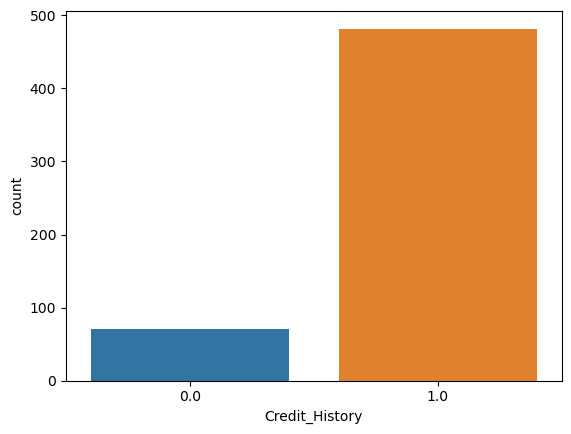

In [28]:
sns.countplot(x='Credit_History', data=df)

#### Comparing Yes and No Loan Statuses for Categorical Imbalances

In [34]:
labels = (
    df['Loan_Status']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

fig.update_layout(xaxis_title='Loan Status', yaxis_title='Number of Loan Applicants')
fig.show()

### ii) Bivariate Analysis

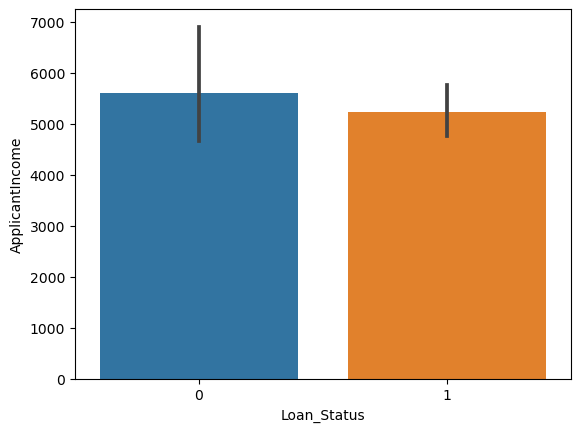

In [32]:

# 1. applicant income and loan status numerical and categorical



sns.barplot(x = 'Loan_Status' , y='ApplicantIncome' , data=df )
plt.show()


# 2 .Education and loan status 
# pd.crosstab(loan_data['Education'] , loan_data['Loan_Status'])

# sns.heatmap(pd.crosstab(loan_data['Education'] , loan_data['Loan_Status']))

# 3. loan_amount and loan_amount_term

#sns.scatterplot( x = 'LoanAmount' , y = 'Loan_Amount_Term' , data=loan_data )

# 4 .  self-employmed and loan status

#pd.crosstab(loan_data['Self_Employed'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Self_Employed'] , loan_data['Loan_Status']))

# 5 . Applicant income and loan amount

#sns.scatterplot( x = 'ApplicantIncome' , y = 'LoanAmount' , data=loan_data )

# 6 . Dependents and loan amount

#sns.scatterplot( x = 'Dependents' , y = 'LoanAmount' , data = loan_data)

# 7 . Gender and loan status

#pd.crosstab(loan_data['Gender'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Gender'] , loan_data['Loan_Status']))

# 8 Married and loan status

#pd.crosstab(loan_data['Married'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Married'] , loan_data['Loan_Status']))

# 9 Credit history and loan status

#pd.crosstab(loan_data['Credit_History'] , loan_data['Loan_Status'])
#sns.heatmap(pd.crosstab(loan_data['Credit_History'] , loan_data['Loan_Status']))

# 10 